In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [180]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
gender_submission = pd.read_csv('./data/gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Step 1.
Predict all passengers as deceased (Survived = 0) <br>
<img src="./images/step1submission.png" />

In [181]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": 0
    })
submission.to_csv('./submission/submission.csv', index=False)

# Step 2.
Predict all females as survived and all males as deceased.
<img src="./images/step2submission.png" />

In [182]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_data["Sex"].map({"male": 0, "female": 1})
    })
submission.to_csv('./submission/step2submission.csv', index=False)

# Step 3. **EDA**

Explore survival rates by __gender__, __age__, __passenger class (Pclass)__, and __family status
(SibSp/Parch)__

Tracks
- PassengerId - 탑승객 Id
- Survived - 생존유무 (0 = Deseased, 1 = Survived)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구

In [183]:
# number of train data
print('Number of train data: ', len(train_data))
# number of test data
print('Number of test data: ', len(test_data))

Number of train data:  891
Number of test data:  418


In [184]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
print(train_data.shape)
print(test_data.shape)

gender_submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [187]:
# train_data, test_data 결측치 확인
train_null = train_data.isnull().sum()
test_null = test_data.isnull().sum()

In [188]:
train_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
test_null

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train_data missing values: Age, Cabin, Embarked

test_data missing values: Age, Fare, Cabin

<Axes: >

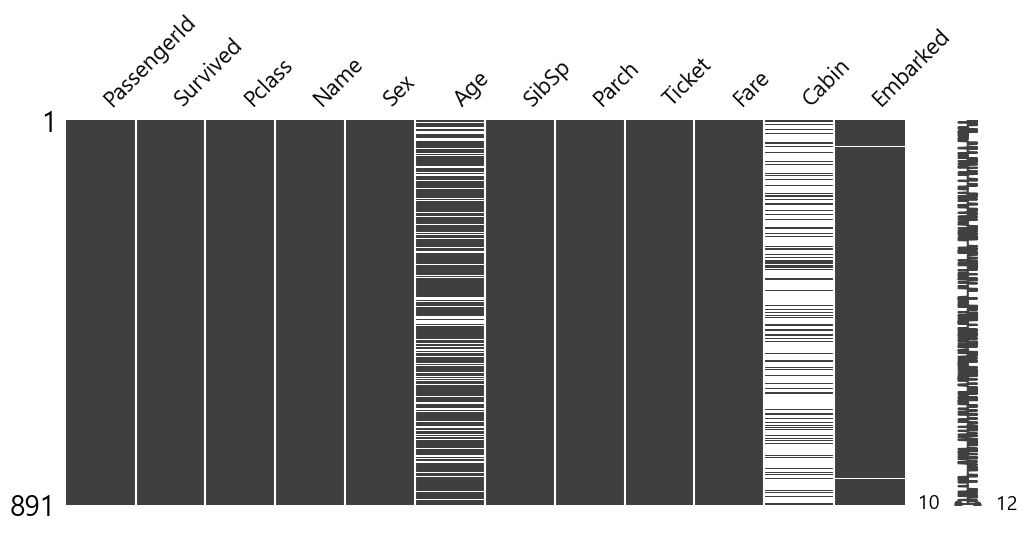

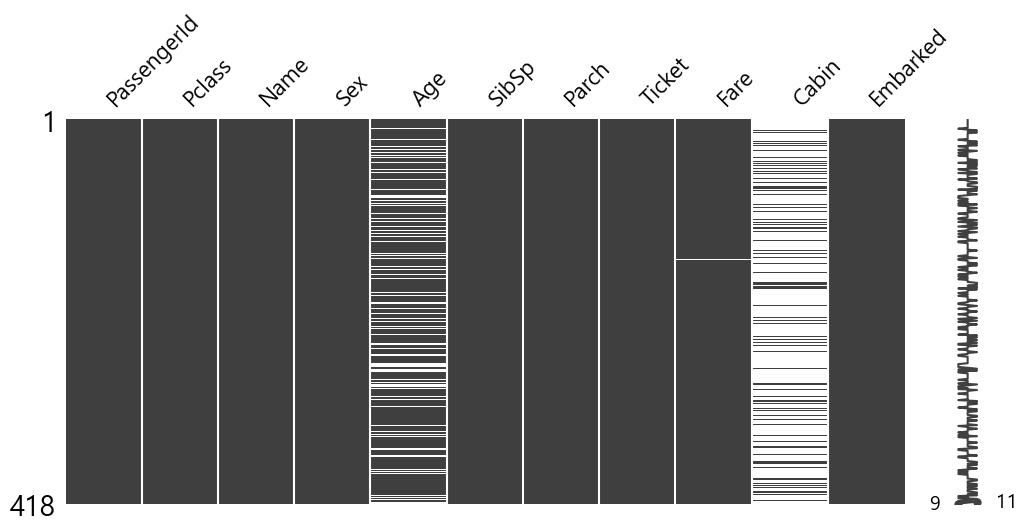

In [190]:
# Missing values visualization
msno.matrix(train_data, figsize=(12,5))
msno.matrix(test_data, figsize=(12,5))

Overall Survival Rate

Text(0, 0.5, 'Survival Rate')

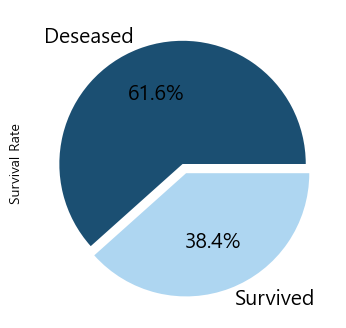

In [191]:
# Overall Survival Rate
train_data['Survived'].value_counts()

plt.figure(figsize=(6,4))
labels = ['Deseased', 'Survived']
colors = ['#1B4F72', '#AED6F1']

train_data['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                              autopct='%1.1f%%',
                                              labels=labels,
                                              textprops={'fontsize': 15},
                                              colors=colors)
plt.ylabel('Survival Rate')

Survival Count / Rates by Gender

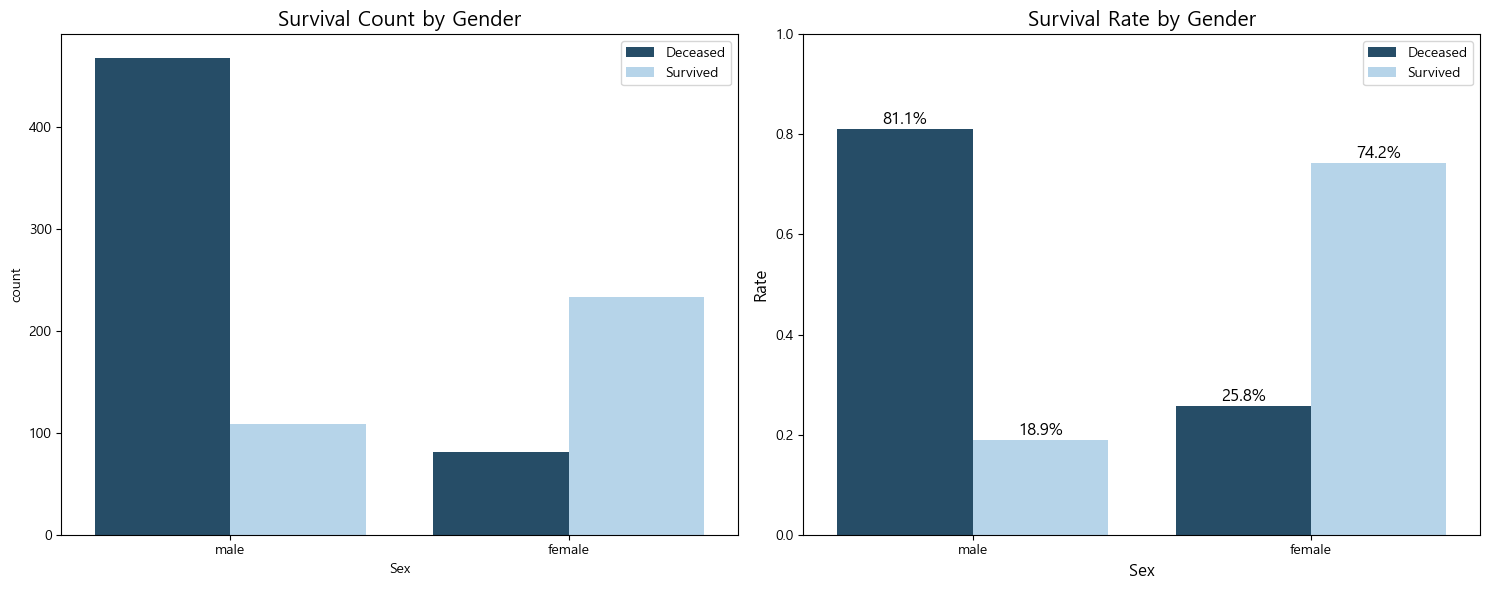

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("Survival Count by Gender", size=15)
sns.countplot(x="Sex", hue="Survived", data=train_data, ax=axes[0], palette=['#1B4F72', '#AED6F1'], order=['male', 'female'])
axes[0].legend(labels=['Deceased', 'Survived'])

# Right - Survival Rates
gender_survival_rate = train_data.groupby('Sex')['Survived'].value_counts(normalize=True).reset_index(name='proportion')

sns.barplot(x='Sex', y='proportion', hue='Survived', data=gender_survival_rate, ax=axes[1], order=['male', 'female'], palette=['#1B4F72', '#AED6F1'])

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2.,
                     height + 0.01,
                     f'{height:.1%}',
                     ha="center",
                     fontsize=12)

axes[1].set_title('Survival Rate by Gender', fontsize=15)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylim(0, 1.0)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

Survival Count / Rates by Age Group

In [193]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

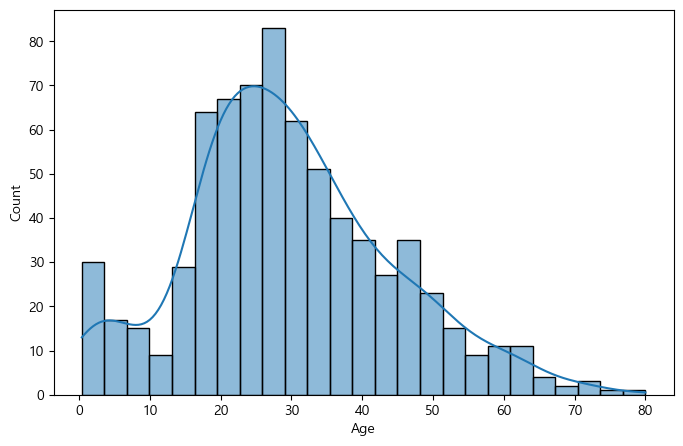

In [194]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], bins=25, kde=True)

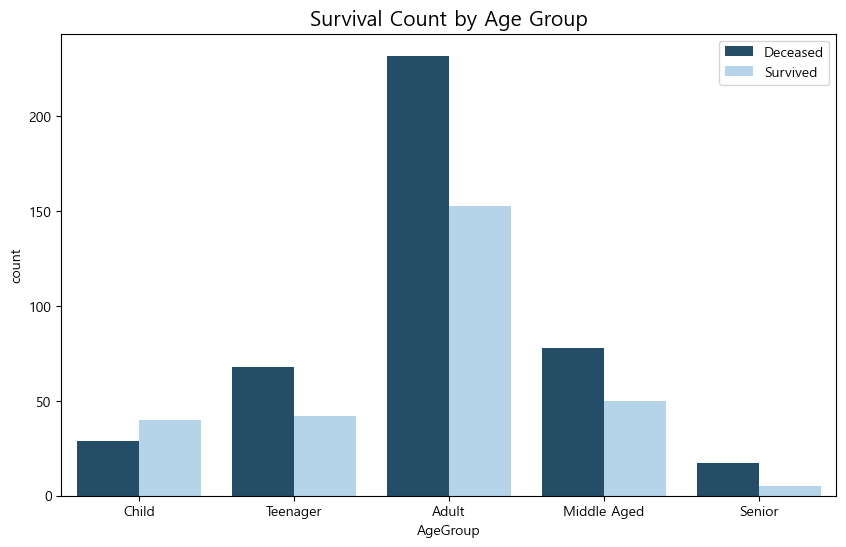

In [195]:
# Survival Count by Age Group
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AgeGroup', hue='Survived', data=train_data, palette=['#1B4F72', '#AED6F1'])
ax.set_title('Survival Count by Age Group', fontsize=15)
ax.legend(labels=['Deceased', 'Survived'])
plt.show()

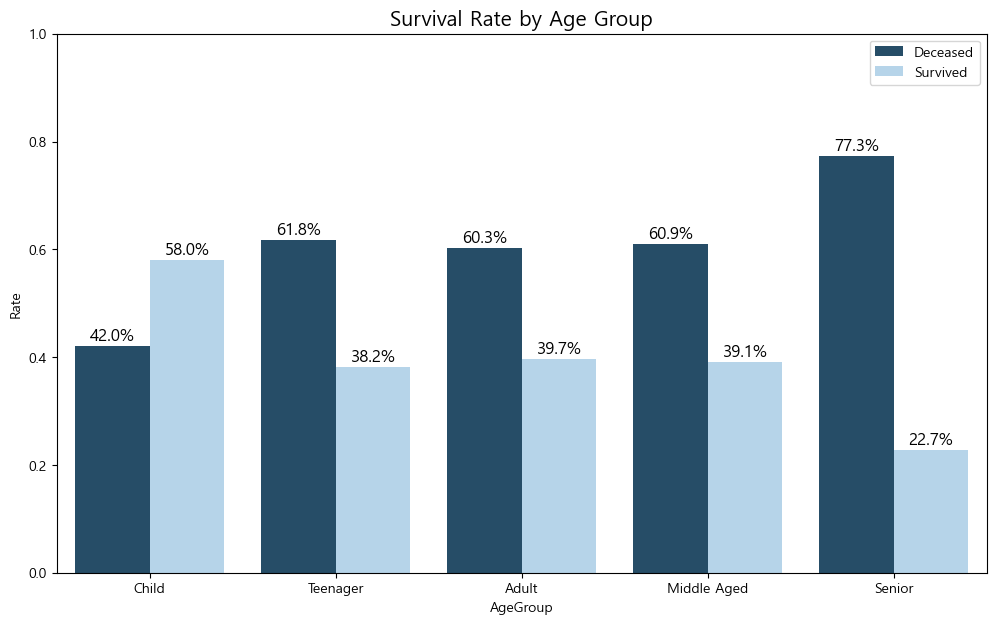

In [196]:
# Survival Rates by Age Group
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior'])

age_survival_rate = train_data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).reset_index(name='proportion')

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='AgeGroup', y='proportion', hue='Survived', data=age_survival_rate, palette=['#1B4F72', '#AED6F1'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.01,
                f'{height:.1%}',
                ha="center",
                fontsize=12)

ax.set_title('Survival Rate by Age Group', fontsize=15)
ax.set_ylabel('Rate')
ax.set_ylim(0, 1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Deceased', 'Survived'])

plt.show()

Survival info. by PClass (Ticket Class)

In [197]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


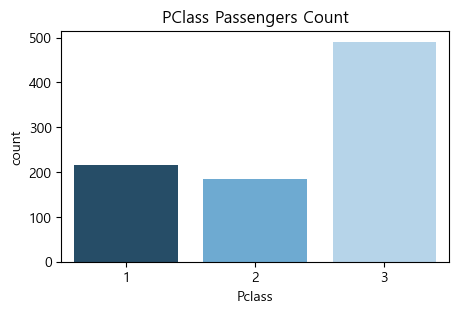

In [198]:
# Total passengers of each PClass
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=train_data, x='Pclass',
                   palette=['#1B4F72', '#5DADE2', '#AED6F1'])

ax.set_title("PClass Passengers Count", size=12)
plt.show()

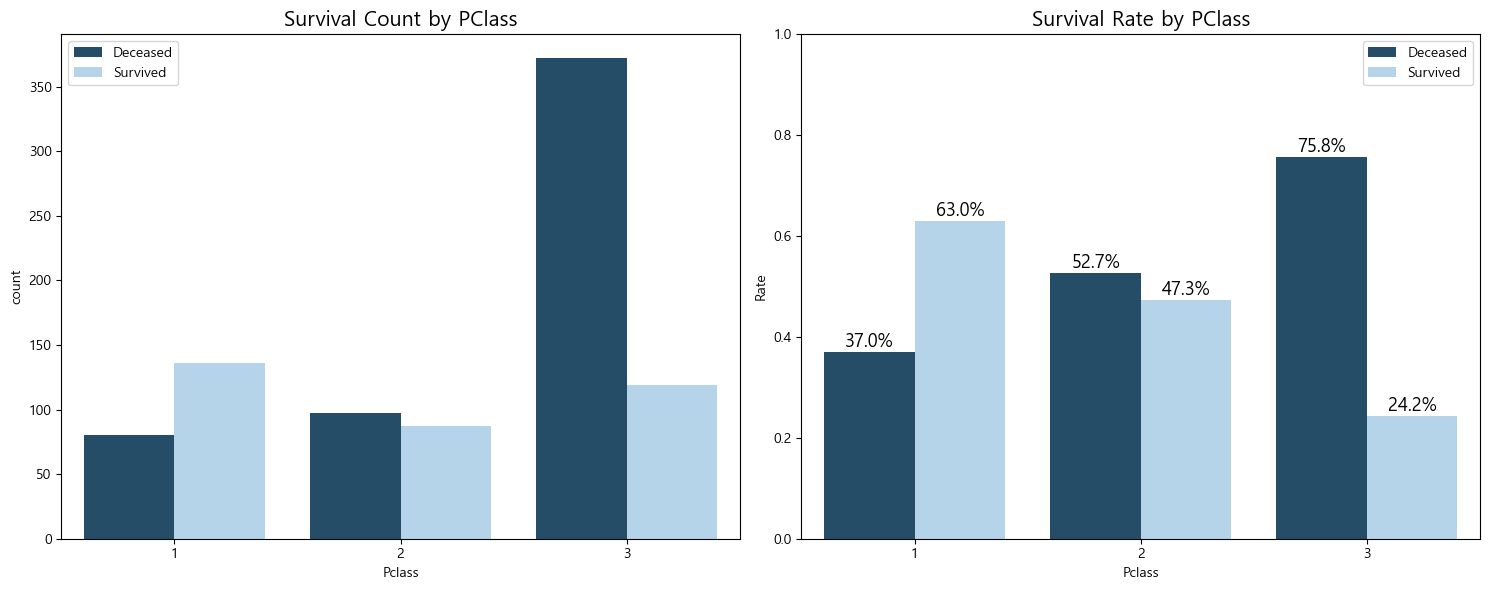

In [199]:
# Survival Count / Rates by PClass

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Survival Count
axes[0].set_title("Survival Count by PClass", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train_data, ax=axes[0], palette=['#1B4F72', '#AED6F1'])
axes[0].legend(labels=['Deceased', 'Survived'])

# Right - Survival Rates
pclass_survival_rate = train_data.groupby('Pclass')['Survived'].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(x='Pclass', y='proportion', hue='Survived', data=pclass_survival_rate, ax=axes[1], palette=['#1B4F72', '#AED6F1'])

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2.,
                     height + 0.01,
                     f'{height:.1%}',
                     ha="center",
                     fontsize=13)

axes[1].set_title("Survival Rate by PClass", size=15)
axes[1].set_ylabel("Rate")
axes[1].set_ylim(0, 1.0)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])


plt.tight_layout()
plt.show()

Fare distribution by Survival Status

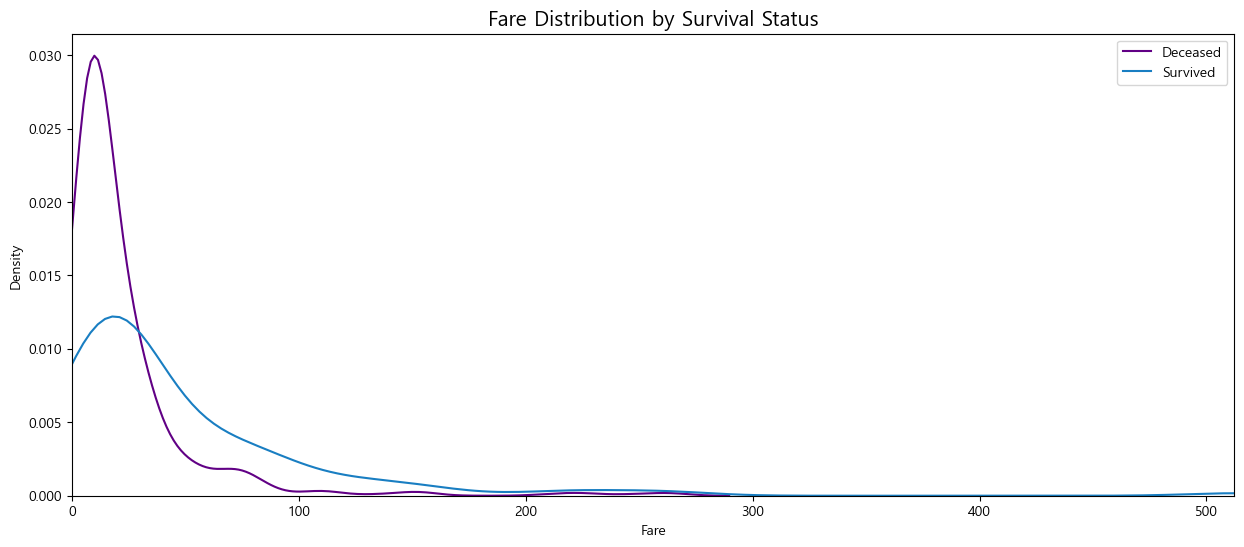

In [200]:
# Fare distribution by Survival Status
fig, ax = plt.subplots(figsize=(15,6))

sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax, color='#610085', label='Deceased')
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax, color='#197EC2', label='Survived')

ax.set(xlim=(0, train_data['Fare'].max()))
ax.set_title('Fare Distribution by Survival Status', fontsize=15)
ax.legend()
plt.show()

Survival Count / Rates by FamilyStatus (SibSp/Parch)

 - SibSp - 함께 탑승한 형제자매, 배우자 수 총합
 - Parch - 함께 탑승한 부모, 자녀 수 총합  

In [201]:
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [202]:
train_data[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


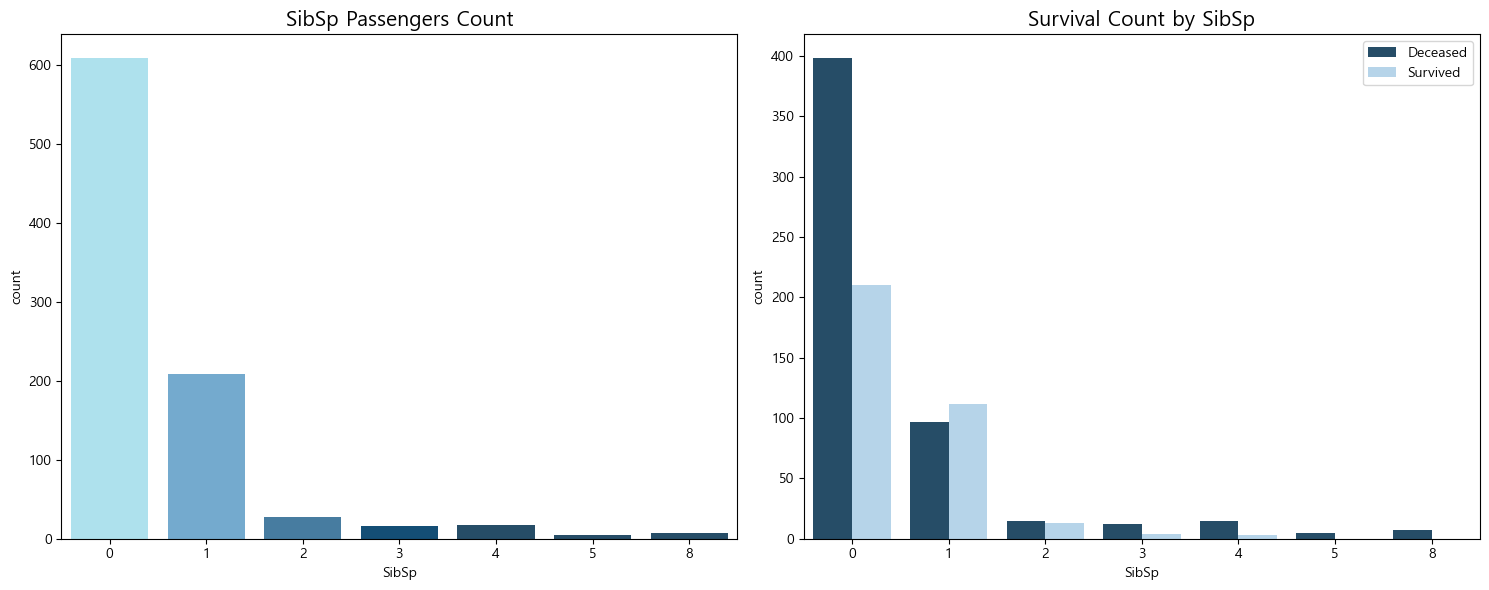

In [203]:
# Survival Count by SibSp
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Total Passengers by SibSp
axes[0].set_title("SibSp Passengers Count", size=15)
sns.countplot(x="SibSp", data=train_data, ax=axes[0], palette=["#A4E8F7", "#65ADDD", "#387FAF", "#045185", '#1B4F72', '#1B4F72', '#1B4F72'])

# Right - Survival Count by SibSp
axes[1].set_title("Survival Count by SibSp", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train_data, ax=axes[1], palette=['#1B4F72', '#AED6F1'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

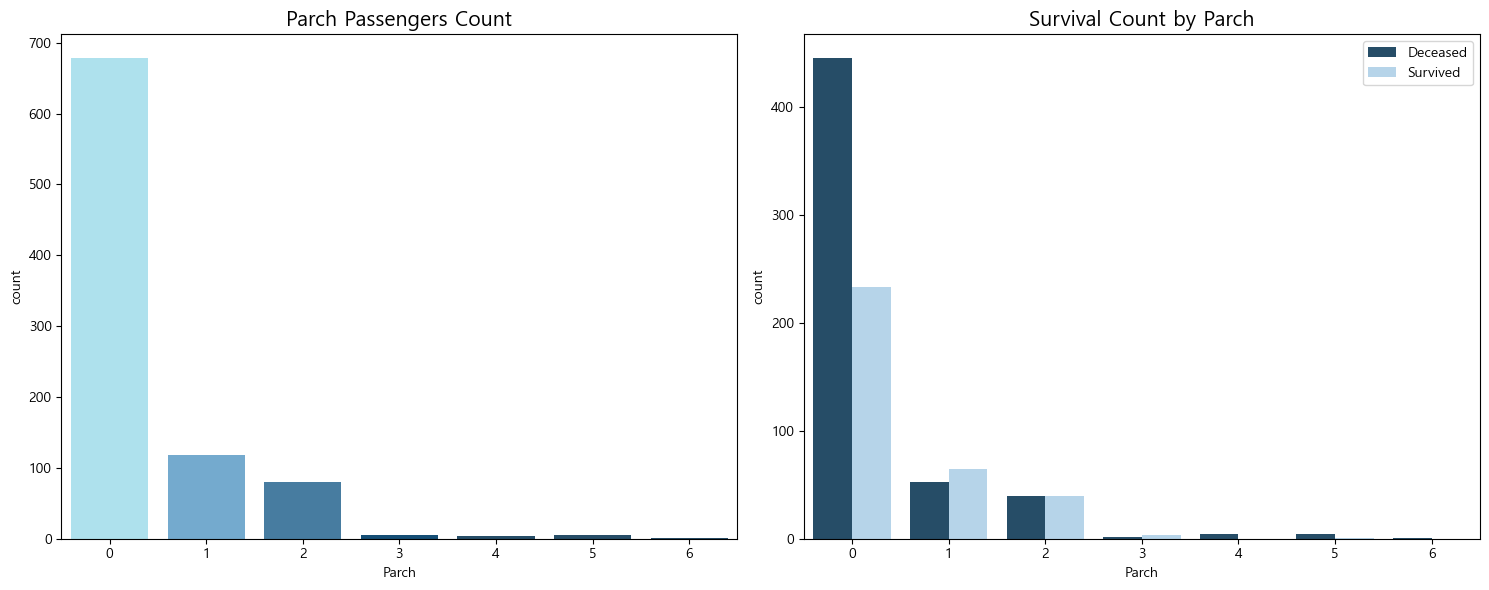

In [204]:
# Survival Count by Parch
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left - Total Parch Passengers
axes[0].set_title("Parch Passengers Count", size=15)
sns.countplot(x="Parch", data=train_data, ax=axes[0], palette=["#A4E8F7", "#65ADDD", "#387FAF", "#045185", '#1B4F72', '#1B4F72', '#1B4F72'])

# Right - Survival Count by Parch
axes[1].set_title("Survival Count by Parch", size=15)
sns.countplot(x="Parch", hue="Survived", data=train_data, ax=axes[1], palette=['#1B4F72', '#AED6F1'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['Deceased', 'Survived'])

plt.tight_layout()
plt.show()

# Step 4. Feature Engineering

In [205]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

dataset = pd.concat([train_data, test_data], sort=False).reset_index(drop=True)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Embarked null

In [206]:
dataset['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [207]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [208]:
dataset['Embarked'].fillna('S', inplace=True)

### Fare null

In [209]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [210]:
dataset['Fare'].groupby(dataset['Pclass']).mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [211]:
dataset.loc[1043, 'Fare'] = 13.3028

In [212]:
dataset['Age'] = dataset['Age'].groupby([dataset['Pclass'], dataset['Sex']]).transform(lambda x: x.fillna(x.mean()))

In [213]:
dataset['LastName'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset['Survived'].groupby(dataset['LastName']).mean()

LastName
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [214]:
dataset['LastName'].value_counts()

LastName
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [215]:
dataset['LastName'] = dataset['LastName'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Don', 'Sir', 'Jonkheer'], 'Mr')
dataset['LastName'] = dataset['LastName'].replace(['Ms', 'Mlle'], 'Miss')
dataset['LastName'] = dataset['LastName'].replace(['Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')
dataset['LastName'].value_counts()

LastName
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [216]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset['TicketFreq'] = dataset.groupby('Ticket')['Ticket'].transform('count')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FamilySize,TicketFreq
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,1,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.962264,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,0,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.962264,0,0,359309,8.0500,NaN,S,Mr,0,1


In [217]:
dataset.loc[dataset['FamilySize'] == 0, 'Solo'] = 1
dataset.loc[dataset['TicketFreq'] == 1, 'Solo'] = 1
dataset['Solo'] = dataset['Solo'].fillna(0)

dataset['Fare'] = pd.qcut(dataset['Fare'], 9, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
dataset['Age'] = pd.qcut(dataset['Age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

dataset = pd.concat([dataset, pd.get_dummies(dataset['Sex'])], axis=1)
dataset.rename(columns={'male': 'Male', 'female':'Female'}, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['Embarked'], prefix='Embarked')], axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset['LastName'])], axis=1)

dataset = dataset.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'LastName'])

In [218]:
dataset['FamilySize'] = pd.cut(dataset['FamilySize'], bins=[-1, 0, 1, 4, 10], labels=[0, 1, 2, 3])
dataset['Survived'].groupby(dataset['TicketFreq']).mean()

TicketFreq
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

In [219]:
dataset['TicketFreq'] = pd.cut(dataset['TicketFreq'], bins=[0, 1, 2, 4, 20], labels=[0, 1, 2, 3])
dataset['TicketFreq'].value_counts()

TicketFreq
0    713
1    264
2    211
3    121
Name: count, dtype: int64

In [220]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Age              0
Fare             0
FamilySize       0
TicketFreq       0
Solo             0
Female           0
Male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Master           0
Miss             0
Mr               0
Mrs              0
dtype: int64

In [221]:
scaler = MinMaxScaler()
# PassengerId 제외하고 정규화
dataset[list(dataset.columns.difference(['PassengerId']))] = scaler.fit_transform(dataset[list(dataset.columns.difference(['PassengerId']))])

In [222]:
labels = dataset.loc[:890, 'Survived']
dataset = dataset.drop(columns = 'Survived')
features = dataset.iloc[:891, :]
features.drop('PassengerId', axis=1, inplace=True)
test_dataset = dataset.iloc[891:, :]
feature_names = features.columns.values

# Step 5.

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [224]:
print(len(features), len(labels))

891 891


In [225]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [226]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7821229050279329
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       105
         1.0       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [18 56]]


In [227]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_liblinear_submission.csv', index=False)

<img src="./images/lr_liblinear_submission.png" />

In [228]:
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7877094972067039
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       105
         1.0       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [17 57]]


In [229]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr2.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_libfgs_submission.csv', index=False)

<img src="./images/lr_libfgs_submission.png" />

In [230]:
lr3 = LogisticRegression(solver='saga')
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7877094972067039
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       105
         1.0       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

Logistic Regression Confusion Matrix:
 [[84 21]
 [17 57]]


In [231]:
test_dataset['PassengerId'] = test_dataset['PassengerId'].astype(int)

submission = pd.DataFrame({
    "PassengerId": test_dataset["PassengerId"],
    "Survived": lr3.predict(test_dataset.drop('PassengerId', axis=1)).astype(int)
    })
submission.to_csv('./submission/lr_saga_submission.csv', index=False)

<img src="./images/lr_saga_submission.png" />